# 1) Ridge regression, lasso, and elastic net: cross-validation & comparison

Read in the dataset, extract response and predictors, split the data into training and testing subsets, and define a range of tuning parameter values for cross-validation.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# supporess scikit-learn's warnings (https://stackoverflow.com/a/33616192)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# read in the data
hitters = pd.read_csv('../../data/Hitters.csv').dropna().drop('Player', axis=1)

# we'll try to predict salary from the dataset's other variables
y = hitters.Salary

X = hitters.drop(['Salary',  # remove the response from the subset of predictors
                  # omit categorical variables since there's no obvious ordering
                  # TODO: use one-hot encoding?
                  'League',
                  'Division',
                  'NewLeague'],
                 axis = 1).astype('float64')

# separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# create a range of alpha values
alphas = 14**np.linspace(2,-4,100)*0.5

Fit ridge regression, lasso, and elastic net models across the range of alphas and plot regularization paths.

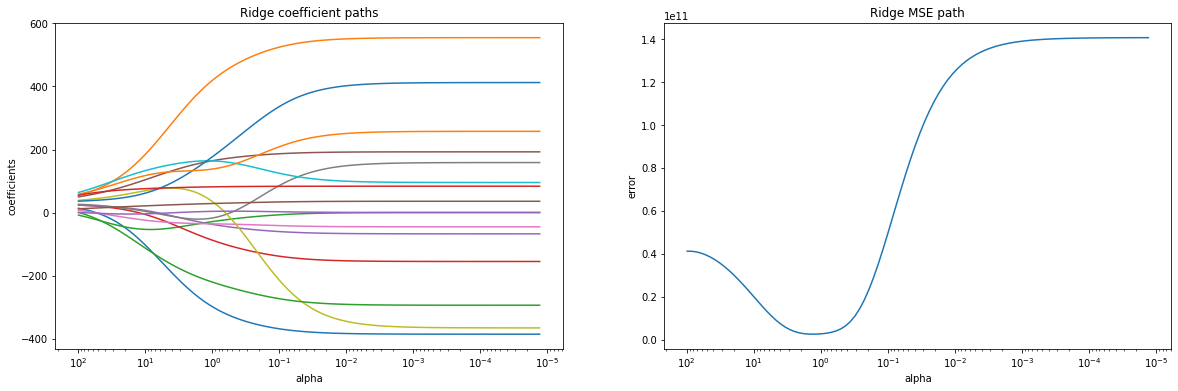

In [12]:
# plotting code adapted from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html#sphx-glr-auto-examples-linear-model-plot-ridge-coeffs-py

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, lars_path
from sklearn.preprocessing import StandardScaler, Normalizer

# ridge = Ridge(normalize=True)
ridge = Ridge()
ridge_coefs = []
ridge_errors = []

for a in alphas:
    ridge.set_params(alpha=a)
    sc = StandardScaler()
    # ridge.fit(X_train, y_train)
    ridge.fit(sc.fit_transform(X_train), y_train)
    ridge_coefs.append(ridge.coef_)
    ridge_errors.append(mean_squared_error(y_test, ridge.predict(X_test)))

plt.figure(figsize=(20, 6))

# coefficient paths
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
ax.invert_xaxis()
plt.title("Ridge coefficient paths")
plt.axis("tight")

# MSE path
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, ridge_errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
ax.invert_xaxis()
plt.title("Ridge MSE path")
plt.axis("tight")
plt.show()

Fit a lasso model, again using LOOCV.

/Users/wes/dev/STAT8330/venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/wes/dev/STAT8330/venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reprodu

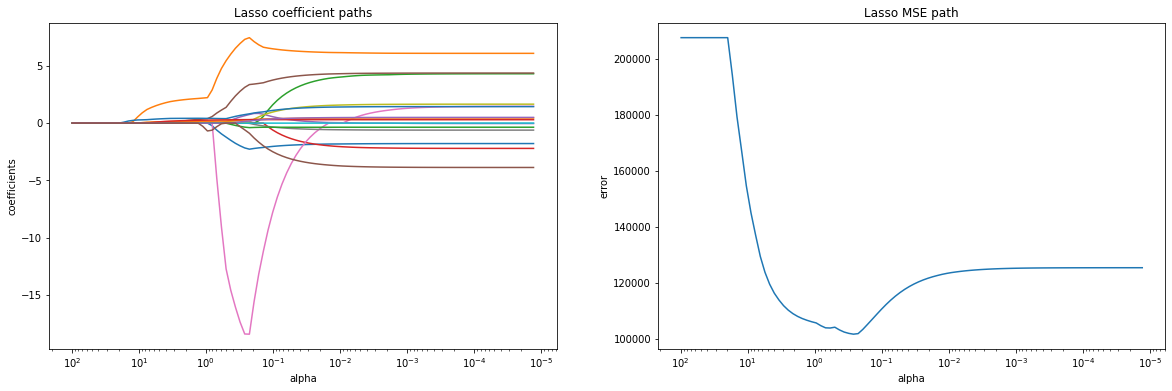

In [78]:
lasso = Lasso(normalize=True)
lasso_coefs = []
lasso_errors = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)
    lasso_errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
ax.invert_xaxis()
plt.title("Lasso coefficient paths")
plt.axis("tight")
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, lasso_errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
ax.invert_xaxis()
plt.title("Lasso MSE path")
plt.axis("tight")
plt.show()

Fit an elastic net model with LOOCV.

/Users/wes/dev/STAT8330/venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
/Users/wes/dev/STAT8330/venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in versio

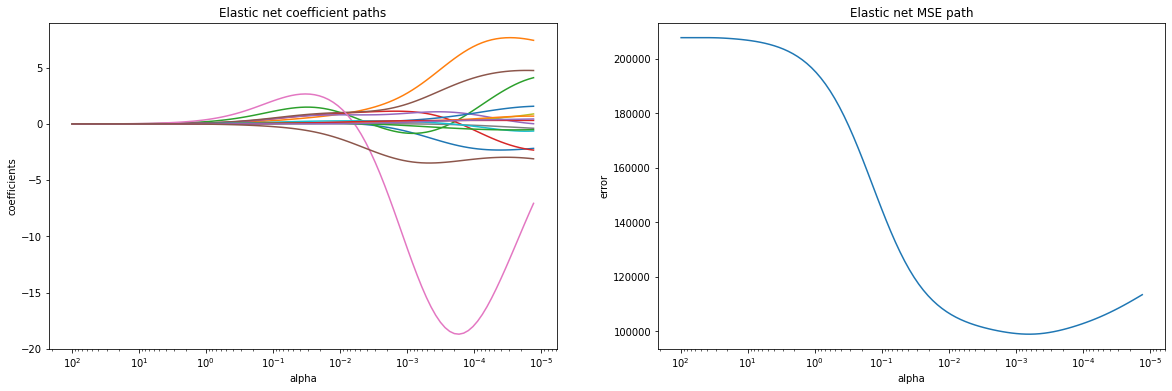

In [79]:
net = ElasticNet(normalize=True)
net_coefs = []
net_errors = []

for a in alphas:
    net.set_params(alpha=a)
    net.fit(X_train, y_train)
    net_coefs.append(net.coef_)
    net_errors.append(mean_squared_error(y_test, net.predict(X_test)))

plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, net_coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
ax.invert_xaxis()
plt.title("Elastic net coefficient paths")
plt.axis("tight")
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, net_errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
ax.invert_xaxis()
plt.title("Elastic net MSE path")
plt.axis("tight")
plt.show()
